In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../data/mnist", one_hot=True, reshape=False)
import tensorflow as tf

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


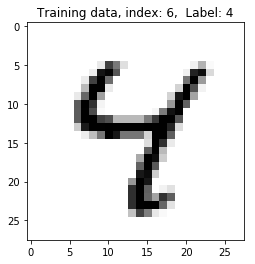

In [7]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def display_digit(index):
    label = mnist.test.labels[index].argmax(axis=0)
    
    #label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = mnist.test.images[index,].reshape([28,28])
    #image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
display_digit(6)

Start Tensorflow

In [8]:
#tensorflow must be reset
tf.reset_default_graph()

# Parameters
learning_rate = 0.001
training_epochs = 50
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256  # layer number of features

#define weights and biases
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer]), name='weight.hl'),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]), name='weight.out')
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer]), name='bias.hl'),
    'out': tf.Variable(tf.random_normal([n_classes]), name='bias.out')
}

# define graph
# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

# Hidden layer with RELU activation
keep_prob = tf.placeholder(tf.float32)
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
layer_1 = tf.nn.dropout(layer_1, keep_prob)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [9]:
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        # Display logs per epoch step
        if epoch % display_step == 0:
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", \
                  "{:.9f}".format(c))
    print("Optimization Finished!")
    
    saver.save(sess, './mnist_2_l.ckpt')

Epoch: 0001 cost= 104.484886169
Epoch: 0002 cost= 71.353393555
Epoch: 0003 cost= 53.500286102
Epoch: 0004 cost= 38.621261597
Epoch: 0005 cost= 38.073062897
Epoch: 0006 cost= 40.052101135
Epoch: 0007 cost= 21.346229553
Epoch: 0008 cost= 25.931295395
Epoch: 0009 cost= 25.033325195
Epoch: 0010 cost= 20.839004517
Epoch: 0011 cost= 17.695516586
Epoch: 0012 cost= 23.252573013
Epoch: 0013 cost= 13.192319870
Epoch: 0014 cost= 20.175168991
Epoch: 0015 cost= 25.816703796
Epoch: 0016 cost= 13.679983139
Epoch: 0017 cost= 10.186441422
Epoch: 0018 cost= 14.485073090
Epoch: 0019 cost= 10.925359726
Epoch: 0020 cost= 16.131336212
Epoch: 0021 cost= 9.028862953
Epoch: 0022 cost= 10.549565315
Epoch: 0023 cost= 8.523704529
Epoch: 0024 cost= 10.347675323
Epoch: 0025 cost= 11.086404800
Epoch: 0026 cost= 10.568126678
Epoch: 0027 cost= 8.535199165
Epoch: 0028 cost= 12.407492638
Epoch: 0029 cost= 7.692915916
Epoch: 0030 cost= 6.919214249
Epoch: 0031 cost= 6.722673416
Epoch: 0032 cost= 12.506849289
Epoch: 0033 c

Load the saved model and try to recognize hand write digit

In [10]:
save_file = './mnist_2_l.ckpt'

#tensorflow must be reset
tf.reset_default_graph()

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)
n_hidden_layer = 256 # layer number of features

weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer]), name='weight.hl'),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]), name='weight.out')
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer]), name='bias.hl'),
    'out': tf.Variable(tf.random_normal([n_classes]), name='bias.out')
}

saver = tf.train.Saver()

features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

keep_prob = tf.placeholder(tf.float32)
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
layer_1 = tf.nn.dropout(layer_1, keep_prob)
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Test model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(accuracy,
        feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1.0})

print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./mnist_2_l.ckpt
Test Accuracy: 0.8781999945640564


Last we test it with our written digits

In [16]:
def predict_image(image):
    save_file = './mnist_2_l.ckpt'

    #tensorflow must be reset
    tf.reset_default_graph()

    n_input = 784  # MNIST data input (img shape: 28*28)
    n_classes = 10  # MNIST total classes (0-9 digits)
    n_hidden_layer = 256 # layer number of features

    weights = {
        'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer]), name='weight.hl'),
        'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]), name='weight.out')
    }
    biases = {
        'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer]), name='bias.hl'),
        'out': tf.Variable(tf.random_normal([n_classes]), name='bias.out')
    }

    saver = tf.train.Saver()

    features = tf.placeholder(tf.float32, [None, n_input])
    labels = tf.placeholder(tf.float32, [None, n_classes])

    x = tf.placeholder("float", [28, 28, 1])

    x_flat = tf.reshape(x, [-1, n_input])

    keep_prob = tf.placeholder(tf.float32)
    layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    logits = tf.matmul(layer_1, weights['out']) + biases['out']

    prediction = tf.argmax(logits, 1)

    # Launch the graph
    with tf.Session() as sess:
        saver.restore(sess, save_file)

        digit = sess.run(prediction,
            feed_dict={x: image, keep_prob:1.0})
        return digit

In [18]:
from skimage import io, util
img = io.imread('4.jpg', as_grey=True)
img = util.invert(img)

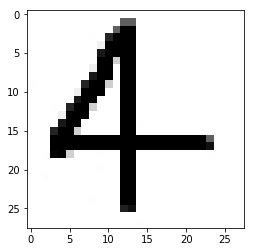

In [19]:
img.shape
plt.imshow(img, cmap='gray_r')
plt.show()

In [20]:
print(predict_image(img.reshape([28,28,1]))[0])

INFO:tensorflow:Restoring parameters from ./mnist_2_l.ckpt
4
